# Aula_Intro_AI

Aluno: mig
Descrição: Versão refatorada para estudo — nomes padronizados e comentários ajustados.


# Classificação por KNN

In [29]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X, y)
KNeighborsClassifier(...)

print(neigh.predict_proba([[0.9]]))

[[1. 0.]]


# Visualização com Seaborn

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


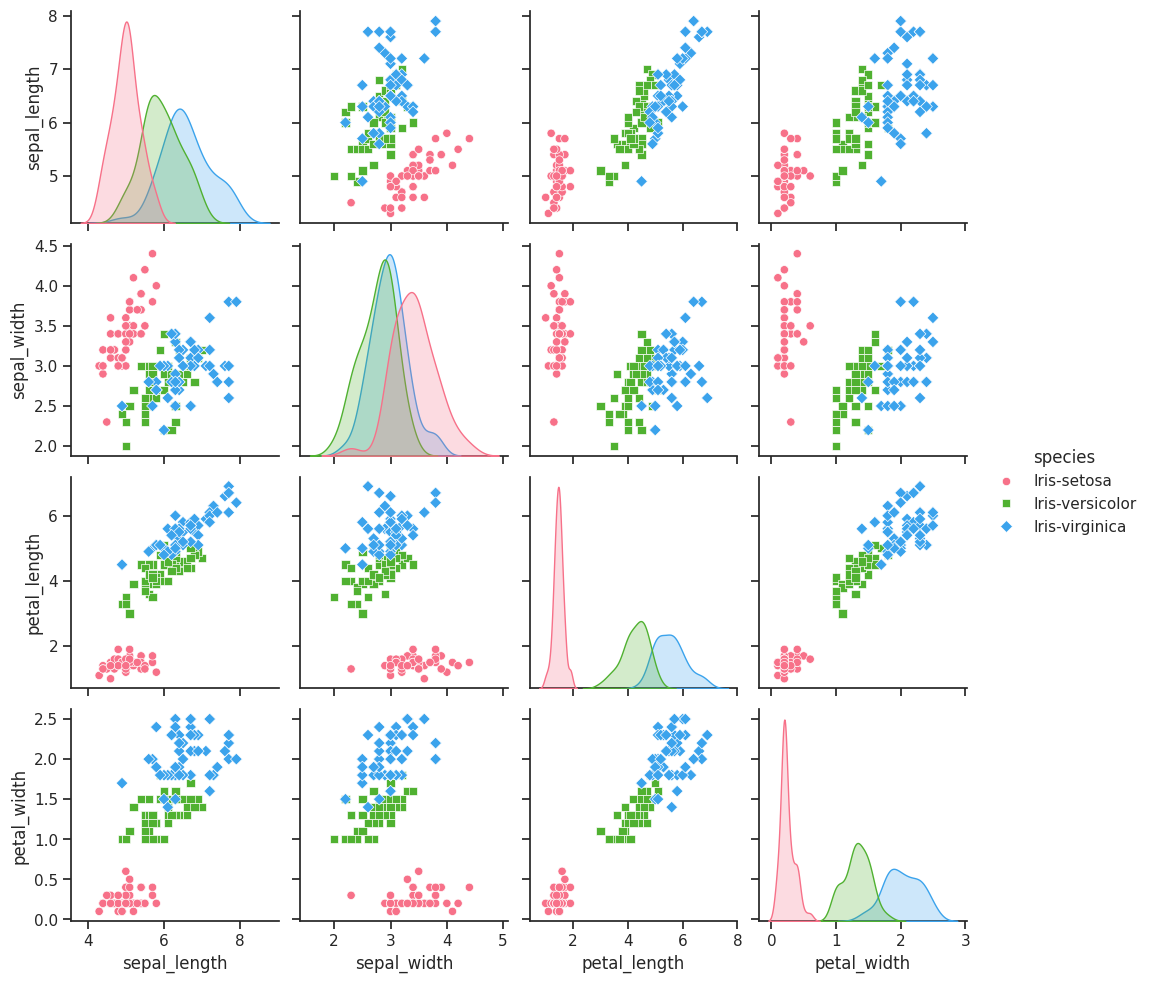

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
header = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

df = pd.read_csv(url, header=None, names=header)
sns.set(style="ticks", color_codes=True)

print(df)

sns.pairplot(df, hue="species", palette="husl", markers=["o", "s", "D"])

plt.show()

# Sub dataframe

In [31]:
entradas = df[['petal_length', 'petal_width']]
classes = df['species']

print(f"Formato das tabelas de dados {entradas.shape} e classes {classes.shape}")

Formato das tabelas de dados (150, 2) e classes (150,)


Teste

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
entradas_treino, entradas_teste, classes_treino, classes_teste = train_test_split(entradas, classes, test_size=0.2)

In [34]:
print(f"Formato das tabelas de dados de treino {entradas_treino.shape} e classes {entradas_teste.shape}")

Formato das tabelas de dados de treino (120, 2) e classes (30, 2)


Primeiras linhas do df

In [35]:
entradas_treino.head()
classes_treino.head()

,species
28,Iris-setosa
87,Iris-versicolor
139,Iris-virginica
26,Iris-setosa
17,Iris-setosa


In [36]:
from sklearn.neighbors import KNeighborsClassifier

Classificação KNN

In [37]:
k = 9
modelo = KNeighborsClassifier(n_neighbors=k)

In [38]:
modelo.fit(entradas_treino, classes_treino)

KNeighborsClassifier(n_neighbors=9)

In [39]:
classes_encontradas = modelo.predict(entradas_teste)
print("Predicação: {}" .format(classes_encontradas))

Predicação: ['Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa']


Acuracia

In [40]:
from sklearn.metrics import accuracy_score
acertos = accuracy_score(classes_teste, classes_encontradas)
print("Acertos médio de classificação: ", acertos)

Acertos médio de classificação:  0.9666666666666667


In [41]:
from sklearn.metrics import accuracy_score
acertos = accuracy_score(classes_teste, classes_encontradas)
print("Acertos médio de classificação: ", acertos)

Acertos médio de classificação:  0.9666666666666667


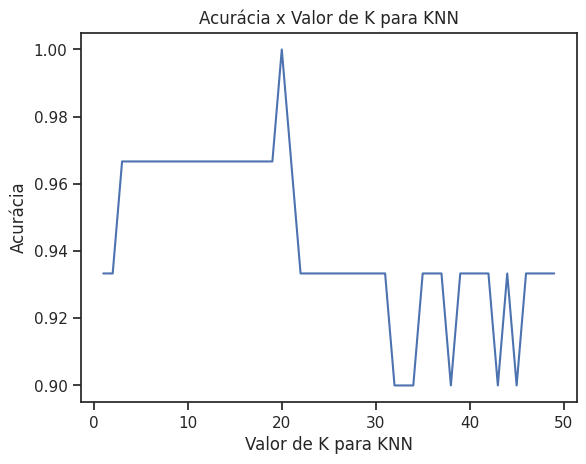

In [42]:
k = 1
k_range = list(range(1, 50))
scores = []

for k in k_range:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(entradas_treino, classes_treino)
    classes_encontradas = modelo.predict(entradas_teste)
    scores.append(accuracy_score(classes_teste, classes_encontradas))

plt.plot(k_range, scores)
plt.xlabel('Valor de K para KNN')
plt.ylabel('Acurácia')
plt.title('Acurácia x Valor de K para KNN')
plt.show()

In [43]:
# Para determinar a quantidade de acertos
k = 27

from sklearn.metrics import accuracy_score
score = accuracy_score(classes_teste, classes_encontradas)
print("Acertos médio de classificação: ", score)

Acertos médio de classificação:  0.9333333333333333


In [44]:
df_amostra = df.groupby('species')[['petal_length','petal_width']].mean()

df_amostra

,petal_length,petal_width
species,,
Iris-setosa,1.464,0.244
Iris-versicolor,4.260,1.326
Iris-virginica,5.552,2.026


In [46]:
nova_amostra = pd.DataFrame([[2.3, 3.2]], columns=['petal_length', 'petal_width'])
predicao = modelo.predict(nova_amostra)
print("Predição: {}".format(predicao))

Predição: ['Iris-versicolor']
